In [1]:
import numpy as np
import xarray as xr
import fsspec
import matplotlib
import matplotlib.pyplot as plt
import pyqg 
import pyqg.diagnostic_tools as tools
import seaborn as sns

%matplotlib inline

# 2D turbulence in eddy model

In [4]:
eddy_model = pyqg.QGModel(nx=512, tmax=311040000.0, twrite=10000, tavestart=155520000.0, beta=0) #defaults match up to Ross paper 

RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug
INFO:  Logger initialized


In [5]:
# From here, you can call .run() to run a new simulation
eddy_model.run()

# Convert to xarray Datasets
eddy_model_highRes = eddy_model.to_dataset()

INFO: Step: 10000, Time: 7.20e+07, KE: nan, CFL:  nan
ERROR: CFL condition violated


AssertionError: None

In [15]:
def generate_snapshots(model):
    snapshots = []
    snapshots.append(model.to_dataset())
    for _ in model.run_with_snapshots(tsnapint=1000*model.dt):
        snapshots.append(model.to_dataset())
    return xr.concat(snapshots, dim='time')

eddy_model_highRes = generate_snapshots(eddy_model)
eddy_model_highRes

<xarray.Dataset>
Dimensions:            (time: 1, lev: 2, y: 64, x: 64, l: 64, k: 33, lev_mid: 1)
Coordinates:
  * time               (time) float64 3.11e+08
  * lev                (lev) int64 1 2
  * lev_mid            (lev_mid) float64 1.5
  * x                  (x) float64 7.812e+03 2.344e+04 ... 9.766e+05 9.922e+05
  * y                  (y) float64 7.812e+03 2.344e+04 ... 9.766e+05 9.922e+05
  * l                  (l) float64 0.0 6.283e-06 ... -1.257e-05 -6.283e-06
  * k                  (k) float64 0.0 6.283e-06 ... 0.0001948 0.0002011
Data variables: (12/32)
    q                  (time, lev, y, x) float64 1.553e-05 ... -4.33e-06
    u                  (time, lev, y, x) float64 -0.08973 -0.06199 ... -0.03483
    v                  (time, lev, y, x) float64 0.0598 0.05336 ... -0.03863
    ufull              (time, lev, y, x) float64 -0.06473 -0.03699 ... -0.03483
    vfull              (time, lev, y, x) float64 0.0598 0.05336 ... -0.03863
    qh                 (time, lev, l, k) complex128 (0.0021168412059859925+0j...
    ...                 ...
    ENSgenspec         (time, l, k) float64 0.0 7.578e-21 ... -6.093e-60
    ENSfrictionspec    (time, l, k) float64 0.0 1.107e-22 ... -2.743e-58
    APEgenspec         (time, l, k) float64 0.0 1.705e-12 ... -1.371e-51
    APEflux            (time, l, k) float64 -0.0 -1.724e-12 ... 2.135e-32
    KEflux             (time, l, k) float64 0.0 3.437e-13 ... 3.649e-26 7.47e-31
    APEgen             (time) float64 3.863e-10
Attributes: (12/23)
    pyqg:beta:       0
    pyqg:delta:      0.25
    pyqg:del2:       0.8
    pyqg:dt:         7200.0
    pyqg:filterfac:  23.6
    pyqg:L:          1000000.0
    ...              ...
    pyqg:tc:         43200
    pyqg:tmax:       311040000.0
    pyqg:twrite:     10000
    pyqg:W:          1000000.0
    title:           pyqg: Python Quasigeostrophic Model
    reference:       https://pyqg.readthedocs.io/en/latest/index.html

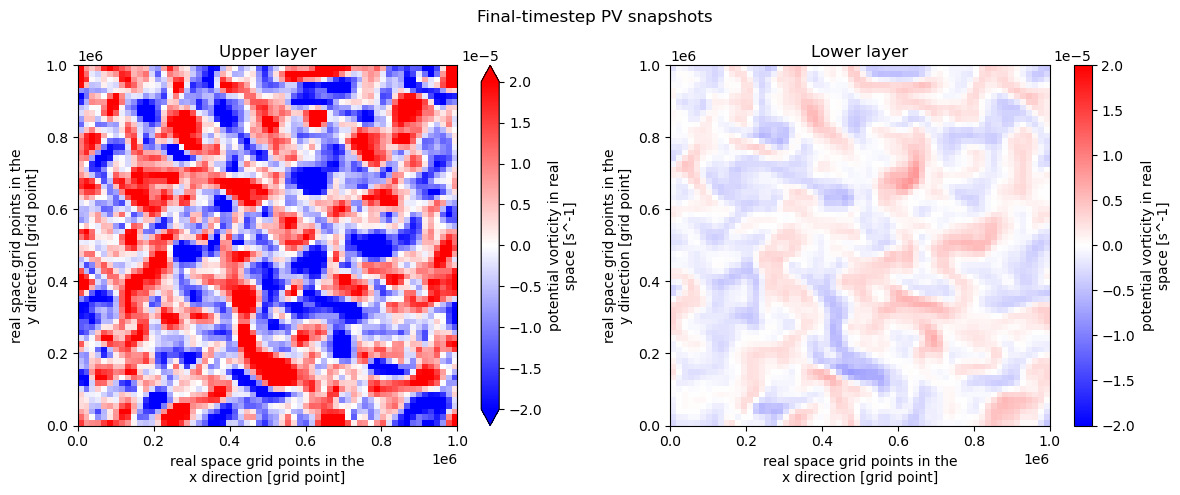

In [16]:
plt.figure(figsize=(12,5)).suptitle("Final-timestep PV snapshots for 2D turbulence in eddy model")
plt.subplot(121); eddy_model_lowRes.q.isel(lev=0, time=-1).plot(vmin=-2e-5, vmax=2e-5, cmap='bwr'); plt.title("Upper layer")
plt.subplot(122); eddy_model_lowRes.q.isel(lev=1, time=-1).plot(vmin=-2e-5, vmax=2e-5, cmap='bwr'); plt.title( "Lower layer")
plt.tight_layout()

# 2D turbulence in jet model

In [17]:
jet_model = pyqg.QGModel(tmax=311040000.0, twrite=10000, tavestart=155520000.0, beta=0, rek=7e-8, delta=0.1) #defaults match up to Ross paper 

RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug
INFO:  Logger initialized


In [18]:
# From here, you can call .run() to run a new simulation
jet_model.run()

# Convert to xarray Datasets
jet_model_lowRes = jet_model.to_dataset()

INFO: Step: 10000, Time: 7.20e+07, KE: 8.09e-03, CFL: 0.308
INFO: Step: 20000, Time: 1.44e+08, KE: nan, CFL:  nan
ERROR: CFL condition violated


AssertionError: None